In [1]:
%matplotlib inline

In [2]:
from knesset_social_dynamics.parsers import commitees, graphs
import pathlib
import matplotlib.pyplot as plt
import random
import networkx as nx
import pandas as pd

# Extract full names of knesset members

In [3]:
km_df = pd.read_csv('data/knesset_members_metadata.csv')

In [4]:
km_full_names = []
for first, last in zip(km_df['FirstName'].values, km_df['LastName']):
    km_full_names.append(" ".join([first, last]))

In [5]:
km_df['FullName'] = km_df.apply(lambda x: " ".join([x.FirstName, x.LastName]),axis=1)
km_df.set_index('FullName', inplace=True)

# Load all of חוץ ובטחון

In [6]:
committees_protocols_folder =  pathlib.Path('data/ועדות לפי נושאים/ועדת החוץ והביטחון')

In [7]:
transcripts = []
for prot in committees_protocols_folder.glob('*'):
    try:
        transcripts.append(commitees.extract_committee_new_transcript(prot))
    except Exception as e:
        continue

2020-08-04 23:40:30.482 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:30.488 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_old_raw_protocol:26 - Parsing old-version protocoal
2020-08-04 23:40:30.490 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:30.532 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal


File is not a zip file


2020-08-04 23:40:30.739 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:30.962 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:31.129 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:31.253 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:31.313 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:31.334 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:31.533 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version pr

In [8]:
transcripts_df = pd.concat(transcripts, ignore_index=True)

In [9]:
transcripts_df

,interaction,speaker_name,speaker_party,subject,text
0,<< יור >>,"יו""ר הוועדה המסדרת אבי ניסנקורן","יו""ר הוועדה המסדרת אבי ניסנקורן",1. בחירת יושב-ראש לוועדה הזמנית לענייני חוץ ו...,"בהתאם להוראות סעיף 106(א)(1) לתקנון הכנסת, הוו..."
1,<< יור >>,"יו""ר הוועדה המסדרת אבי ניסנקורן","יו""ר הוועדה המסדרת אבי ניסנקורן",1. בחירת יושב-ראש לוועדה הזמנית לענייני חוץ ו...,הצבעה
2,<< יור >>,"יו""ר הוועדה המסדרת אבי ניסנקורן","יו""ר הוועדה המסדרת אבי ניסנקורן",1. בחירת יושב-ראש לוועדה הזמנית לענייני חוץ ו...,אושר.
3,<< יור >>,"יו""ר הוועדה המסדרת אבי ניסנקורן","יו""ר הוועדה המסדרת אבי ניסנקורן",1. בחירת יושב-ראש לוועדה הזמנית לענייני חוץ ו...,"אושר פה אחד. מזל טוב, גבי."
4,<< יור >>,גבי אשכנזי,"יו""ר",1. בחירת יושב-ראש לוועדה הזמנית לענייני חוץ ו...,"תודה רבה, אבי."
...,...,...,...,...,...
15719,<< יור >>,צבי האוזר,"יו""ר",החלק שנותר מהפיצול - הצעת חוק הסמכת שירות הבי...,נמנעים – אין
15720,<< יור >>,צבי האוזר,"יו""ר",החלק שנותר מהפיצול - הצעת חוק הסמכת שירות הבי...,נוסח החוק אושר
15721,<< יור >>,צבי האוזר,"יו""ר",החלק שנותר מהפיצול - הצעת חוק הסמכת שירות הבי...,"הנוסח אושר. לגבי ההסתייגויות, קבענו שזה ייכנס ..."
15722,<< קריאה >>,צבי האוזר,"יו""ר",החלק שנותר מהפיצול - הצעת חוק הסמכת שירות הבי...,אני רוצה לומר תודה לכל הארגונים האזרחיים שליוו...


# Build interrupt network

In [10]:
inter_graph = graphs.extract_transcript_graph(transcripts_df, g_type='committee_breaking')

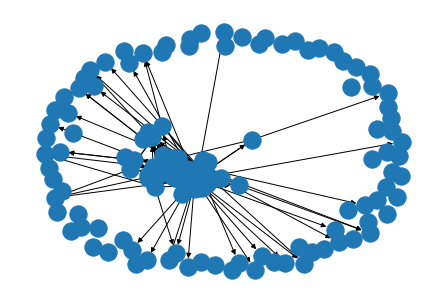

In [11]:
nx.draw(inter_graph)

# Remove non knesset members 

In [12]:
nodes = dict(inter_graph.nodes())
for node in nodes:
    if (str(node)) not in km_full_names:
        inter_graph.remove_node(node)

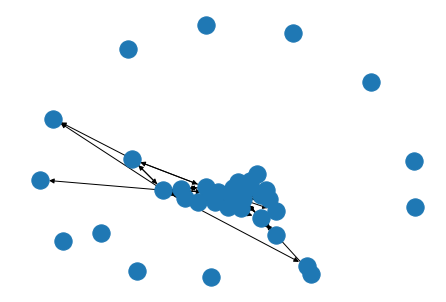

In [13]:
nx.draw(inter_graph)

In [14]:
graphs.extract_adjacency_matrix(inter_graph, 'data/adjacency_matrixes/hutz_bitahon_adj.csv')

In [15]:
graphs.extract_features_matrix(inter_graph, 'data/feature_matrixes/hutz_bitahon_feat.csv')

# Load all of ועדת הכספים

In [16]:
committees_protocols_folder =  pathlib.Path('data/ועדות לפי נושאים/ועדת הכספים')

In [17]:
transcripts = []
for prot in committees_protocols_folder.glob('*'):
    try:
        transcripts.append(commitees.extract_committee_new_transcript(prot))
    except Exception as e:
        continue

2020-08-04 23:40:42.609 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:42.635 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:42.683 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:42.730 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:42.777 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:42.800 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:42.852 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version pr

2020-08-04 23:40:46.717 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:46.801 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:46.864 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:46.954 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:46.986 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:47.385 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:40:47.872 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version pr

File is not a zip file


In [18]:
transcripts_df = pd.concat(transcripts, ignore_index=True)

In [19]:
transcripts_df

,interaction,speaker_name,speaker_party,subject,text
0,<< יור >>,עודד פורר,"יו""ר",עדכון מאת רשות המיסים – בהתייחס להתמודדות עם מ...,"בוקר טוב, אני מתכבד לפתוח את ישיבת ועדת הכספים..."
1,<< דובר >>,שלמה קרעי,הליכוד,עדכון מאת רשות המיסים – בהתייחס להתמודדות עם מ...,"תודה, אדוני היושב-ראש. ההצעה לסדר נוגעת בעצם ל..."
2,<< דובר >>,שלמה קרעי,הליכוד,עדכון מאת רשות המיסים – בהתייחס להתמודדות עם מ...,"יש עוד כמה דברים, אבל אחד המשמעותיים – עובדים ..."
3,<< יור >>,עודד פורר,"יו""ר",עדכון מאת רשות המיסים – בהתייחס להתמודדות עם מ...,תודה. חברת הכנסת פרקש.
4,<< דובר >>,אורית פרקש הכהן,כחול לבן,עדכון מאת רשות המיסים – בהתייחס להתמודדות עם מ...,"אדוני היושב-ראש, רציתי להציע הצעה לסדר ולבקש א..."
...,...,...,...,...,...
26429,<< יור >>,משה גפני,"יו""ר",הצעת החלטת שכר שרים וסגני שרים (תיקון והוראת ...,נמנעים – אין
26430,<< יור >>,משה גפני,"יו""ר",הצעת החלטת שכר שרים וסגני שרים (תיקון והוראת ...,הרביזיה לא התקבלה.
26431,<< יור >>,משה גפני,"יו""ר",הצעת החלטת שכר שרים וסגני שרים (תיקון והוראת ...,"ארבעה בעד. שישה נגד. הרביזיה לא התקבלה, והסעיף..."
26432,<< דובר >>,מיקי לוי,"יש עתיד-תל""ם",הצעת החלטת שכר שרים וסגני שרים (תיקון והוראת ...,עד מתי?


# Build interrupt network

In [20]:
inter_graph = graphs.extract_transcript_graph(transcripts_df, g_type='committee_breaking')

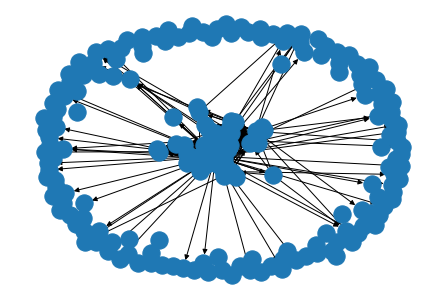

In [21]:
nx.draw(inter_graph)

# Remove non knesset members 

In [22]:
nodes = dict(inter_graph.nodes())
for node in nodes:
    if (str(node)) not in km_full_names:
        inter_graph.remove_node(node)


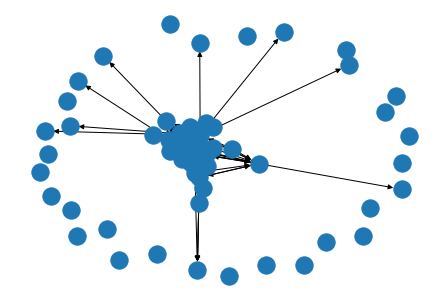

In [23]:
nx.draw(inter_graph)

In [24]:
graphs.extract_adjacency_matrix(inter_graph, 'data/adjacency_matrixes/ksafim_adj.csv')

In [25]:
graphs.extract_features_matrix(inter_graph, 'data/feature_matrixes/ksafim_feat.csv')

# Load all of ועדת החוקה, חוק ומשפט

In [26]:
committees_protocols_folder =  pathlib.Path('data/ועדות לפי נושאים/ועדת החוקה, חוק ומשפט')

In [27]:
transcripts = []
for prot in committees_protocols_folder.glob('*'):
    try:
        transcripts.append(commitees.extract_committee_new_transcript(prot))
    except Exception as e:
        continue

2020-08-04 23:41:09.022 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:41:09.035 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:41:09.153 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:41:09.197 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:41:09.208 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:41:09.218 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:41:09.286 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version pr

In [28]:
transcripts_df = pd.concat(transcripts, ignore_index=True)

In [29]:
transcripts_df

,interaction,speaker_name,speaker_party,subject,text
0,<< דובר >>,איתן גינזבורג,"יו""ר ועדת הכנסת",בחירת יושב-ראש הוועדה,"אני מתכבד לפתוח את ישיבת ועדת החוקה, חוק ומשפט..."
1,<< דובר >>,איתן גינזבורג,"יו""ר ועדת הכנסת",בחירת יושב-ראש הוועדה,ועדת הכנסת החליטה היום להמליץ בפני הוועדה הזאת...
2,<< דובר >>,יעקב אשר,יהדות התורה,בחירת יושב-ראש הוועדה,זה אתה אומר כראש עיר לשעבר.
3,<< דובר >>,איתן גינזבורג,"יו""ר ועדת הכנסת",בחירת יושב-ראש הוועדה,"כראש עיר לשעבר, אני אומר, כמי ששירת ברשות המקו..."
4,<< דובר >>,איתן גינזבורג,"יו""ר ועדת הכנסת",בחירת יושב-ראש הוועדה,אני מתכבד להעלות להצבעה ולהמליץ בפני הוועדה לב...
...,...,...,...,...,...
25640,<< יור >>,יעקב אשר,"יו""ר",הצעת חוק סמכויות מיוחדות להתמודדות עם נגיף הק...,"תודה רבה לכולכם, וגם כאן עשינו דברים טובים."
25641,<< דובר >>,מירה סלומון,מירה סלומון,הצעת חוק סמכויות מיוחדות להתמודדות עם נגיף הק...,מאוזנים.
25642,<< יור >>,יעקב אשר,"יו""ר",הצעת חוק סמכויות מיוחדות להתמודדות עם נגיף הק...,דברים טובים ודברים מאוזנים. אנחנו גם שומרים על...
25643,<< יור >>,יעקב אשר,"יו""ר",הצעת חוק סמכויות מיוחדות להתמודדות עם נגיף הק...,יש הרבה זוגות שהאריכו ימים ותמיד היו להם ויכוח...


# Build interrupt network

In [30]:
inter_graph = graphs.extract_transcript_graph(transcripts_df, g_type='committee_breaking')

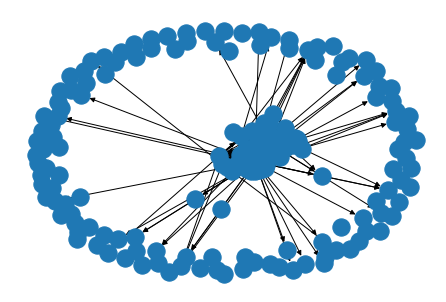

In [31]:
nx.draw(inter_graph)

# Remove non knesset members 

In [32]:
nodes = dict(inter_graph.nodes())
for node in nodes:
    if (str(node)) not in km_full_names:
        inter_graph.remove_node(node)

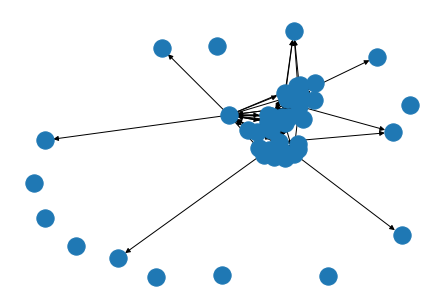

In [33]:
nx.draw(inter_graph)

In [34]:
graphs.extract_adjacency_matrix(inter_graph, 'data/adjacency_matrixes/huka_adj.csv')

In [35]:
graphs.extract_features_matrix(inter_graph, 'data/feature_matrixes/huka_feat.csv')

# Load all of ועדת הכנסת

In [36]:
committees_protocols_folder =  pathlib.Path('data/ועדות לפי נושאים/ועדת הכנסת')

In [39]:
transcripts = []
for prot in committees_protocols_folder.glob('*'):
    try:
        transcripts.append(commitees.extract_committee_new_transcript(prot))
    except Exception as e:
        continue

2020-08-04 23:41:47.225 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:41:47.249 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:41:47.262 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:41:47.277 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:41:47.311 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:41:47.336 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version protocoal
2020-08-04 23:41:47.346 | DEBUG    | knesset_social_dynamics.parsers.text_extractor:extract_new_raw_protocol:15 - Parsing new-version pr

In [40]:
transcripts_df = pd.concat(transcripts, ignore_index=True)

In [41]:
transcripts_df

,interaction,speaker_name,speaker_party,subject,text
0,<< דובר >>,יושב-ראש הכנסת יריב לוין,יושב-ראש הכנסת יריב לוין,א. בחירת יושב-ראש לוועדת הכנסת,"ערב טוב לכולם. למי שיש ספק שהחיים הם מעגליים, ..."
1,<< דובר >>,אחמד טיבי,הרשימה המשותפת,א. בחירת יושב-ראש לוועדת הכנסת,אני היחיד שזוכר.
2,<< דובר >>,יושב-ראש הכנסת יריב לוין,יושב-ראש הכנסת יריב לוין,א. בחירת יושב-ראש לוועדת הכנסת,נכון. זאת הזדמנות שוב להגיד תודה לכל הצוות המד...
3,<< דובר >>,יושב-ראש הכנסת יריב לוין,יושב-ראש הכנסת יריב לוין,א. בחירת יושב-ראש לוועדת הכנסת,הצבעה
4,<< דובר >>,יושב-ראש הכנסת יריב לוין,יושב-ראש הכנסת יריב לוין,א. בחירת יושב-ראש לוועדת הכנסת,בעד ההצעה – 13
...,...,...,...,...,...
4416,<< יור >>,איתן גינזבורג,"יו""ר","קביעת סדרי דיון מיוחדים, לפי סעיף 98 לתקנון ה...",בעד – 10
4417,<< יור >>,איתן גינזבורג,"יו""ר","קביעת סדרי דיון מיוחדים, לפי סעיף 98 לתקנון ה...",נגד – 4
4418,<< יור >>,איתן גינזבורג,"יו""ר","קביעת סדרי דיון מיוחדים, לפי סעיף 98 לתקנון ה...",נמנעים – אין
4419,<< יור >>,איתן גינזבורג,"יו""ר","קביעת סדרי דיון מיוחדים, לפי סעיף 98 לתקנון ה...",ההצעה נתקבלה.


# Build interrupt network

In [42]:
inter_graph = graphs.extract_transcript_graph(transcripts_df, g_type='committee_breaking')

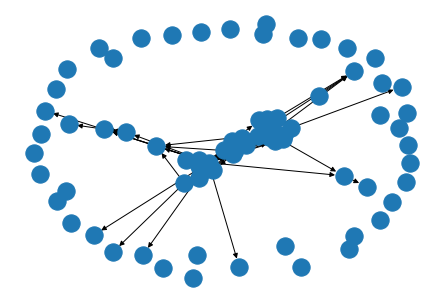

In [43]:
nx.draw(inter_graph)

# Remove non knesset members 

In [44]:
nodes = dict(inter_graph.nodes())
for node in nodes:
    if (str(node)) not in km_full_names:
        inter_graph.remove_node(node)

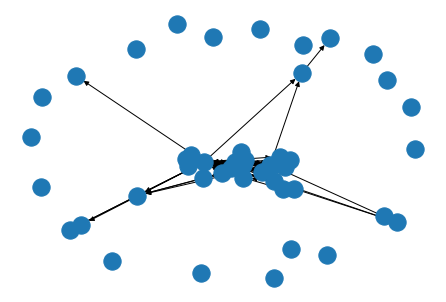

In [45]:
nx.draw(inter_graph)

In [46]:
graphs.extract_adjacency_matrix(inter_graph, 'data/adjacency_matrixes/knesset_adj.csv')

In [47]:
graphs.extract_features_matrix(inter_graph, 'data/feature_matrixes/knesset_feat.csv')